<a href="https://colab.research.google.com/github/melusina74/moniprueba/blob/main/Final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Marzo 2024 - Desarrollo de Sistemas de Inteligencia Artificial

---

## Resumen del Conjunto de Datos

El conjunto de datos proporcionado contiene información relevante sobre pacientes y características relacionadas con la salud.


**Este conjunto de datos nos brinda una visión general de la salud de los pacientes, así como de factores de riesgo potenciales como la hipertensión, la enfermedad cardíaca, el tabaquismo y los niveles de glucosa en sangre.**


Estas son algunas de las variables incluidas en el conjunto de datos:

---

## Diccionario de datos:


**gender:**

Descripción: Género del individuo.

Valores posibles: "Male" (Masculino), "Female" (Femenino).

----------

**age:**

Descripción: Edad del individuo.

Valores posibles: Valor numérico que representa la edad en años.

----------
**hypertension:**

Descripción: Indica si el individuo tiene hipertensión o no.

Valores posibles: 0 (No tiene hipertensión), 1 (Tiene hipertensión).

----------
**heart_disease:**

Descripción: Indica si el individuo tiene enfermedad cardíaca o no.

Valores posibles: 0 (No tiene enfermedad cardíaca), 1 (Tiene enfermedad cardíaca).

----------
**smoking_history:**

Descripción: Historial de tabaquismo del individuo.

Valores posibles: "never" (Nunca ha fumado), "current" (Fumador actual), "former" (Ex fumador), "No Info" (Sin información).

----------

**bmi:**

Descripción: Índice de masa corporal (IMC) del individuo.

Valores posibles: Valor numérico que representa el IMC.

----------

**HbA1c_level:**

Descripción: Nivel de HbA1c del individuo (hemoglobina glicosilada).

Valores posibles: Valor numérico que representa el nivel de HbA1c.

----------

**blood_glucose_level:**

Descripción: Nivel de glucosa en sangre del individuo.

Valores posibles: Valor numérico que representa el nivel de glucosa en mg/dL.

----------

**diabetes:**

Descripción: Indica si el individuo tiene diabetes o no.

Valores posibles: 0 (No tiene diabetes), 1 (Tiene diabetes).










### Ejercicio 1:  Identificar la cantidad de pacientes según su historial de tabaquismo.
---
### Ejercicio 2: Identificar el paciente con el mayor nivel de glucosa en sangre, su gènero y edad.
---
### Ejercicio 3: Predicción de diabetes utilizando una red neuronal
En este ejercicio se desarrollará un modelo de predicción de diabetes utilizando una red neuronal. Se entrenará el modelo con un conjunto de datos y se evaluará su rendimiento utilizando una matriz de confusion.

**Se deberá utilizar el 70% del dataset para el entrenamiento y el 30% para el testeo**


**por la duración del examen, el profesor me pidió que el entrenamiento no supere las 5 epocas**
---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

In [ ]:
#Cargo el dataset en un array de NumPy llamado data, donde cada elemento del array representa una fila del archivo CSV


data = np.loadtxt('/content/drive/MyDrive/Final_IA_2024/diabetes_prediction_dataset.csv',delimiter = ',',dtype=str,comments='?')
data

array([['gender', 'age', 'hypertension', ..., 'HbA1c_level',
        'blood_glucose_level', 'diabetes'],
       ['Female', '80.0', '0', ..., '6.6', '140', '0'],
       ['Female', '54.0', '0', ..., '6.6', '80', '0'],
       ...,
       ['Male', '66.0', '0', ..., '5.7', '155', '0'],
       ['Female', '24.0', '0', ..., '4.0', '100', '0'],
       ['Female', '57.0', '0', ..., '6.6', '90', '0']], dtype='<U19')

In [ ]:
# Para entrenar la red neuronal, es necesario que toda la información se encuentre representada numéricamente, ya que los algoritmos de aprendizaje automático requieren datos numéricos para realizar cálculos.
# Por lo tanto, armo estos diccionarios para mapear las variables en texto a valores numéricos, permitiendo así su utilización en el entrenamiento de la red neuronal.


# Diccionario de mapeo para géneros:
# Las claves son los géneros ('Male', 'Female', 'Other') y los valores son los códigos numéricos correspondientes ('1', '2', '3').
generos =  {'Male':'1',
           'Female':'2',
           'Other':'3'}

# Diccionario de mapeo para hábitos de tabaquismo:
# Las claves son los estados de tabaquismo ('No Info', 'current', 'ever', 'former', 'never', 'not current') y los valores son los códigos numéricos correspondientes ('1', '2', '3', '4', '5', '6').
tabaquismo ={'No Info':'1',
            'current':'2',
           'ever':'3',
            'former':'4',
           'never':'5',
            'not current':'6'}

In [ ]:
# En este bloque de código, estamos convirtiendo las variables categóricas en el conjunto de datos en variables numéricas utilizando los diccionarios previamente definidos ('generos' y 'tabaquismo').
# Primero, creamos dos listas vacías, 'newgen' y 'newtab', donde almacenaremos los valores numéricos correspondientes a las variables categóricas 'género' y 'hábito de fumar', respectivamente.
# Luego, iteramos sobre las filas del conjunto de datos, comenzando desde la segunda fila (índice 1), ya que la primera fila  contiene encabezados y no datos.
# En cada iteración, buscamos el valor categórico en la columna específica ('género' o 'hábito de fumar') y lo mapeamos a su equivalente numérico utilizando los diccionarios 'generos' y 'tabaquismo'.
# Finalmente, agregamos el valor numérico correspondiente a las listas 'newgen' y 'newtab'.
# Al final del bucle, imprimimos la lista 'newtab' para verificar los valores numéricos convertidos correspondientes al hábito de fumar.

newgen = []
for fila in data[1: ,0]:
  gen = generos[fila[:]]
  newgen.append(gen)

newtab = []
for fila in data[1: ,4]:
  tab = tabaquismo[fila[:]]
  newtab.append(tab)
print(newtab)


['5', '1', '5', '2', '2', '5', '5', '1', '5', '5', '5', '4', '4', '5', '1', '1', '5', '5', '1', '3', '2', '1', '5', '4', '1', '5', '6', '4', '5', '5', '1', '1', '2', '5', '5', '1', '1', '5', '2', '5', '4', '1', '5', '1', '1', '5', '5', '5', '5', '1', '5', '1', '1', '4', '5', '4', '1', '5', '1', '5', '2', '6', '2', '4', '6', '3', '6', '1', '5', '1', '1', '1', '5', '6', '5', '5', '1', '5', '5', '4', '1', '1', '4', '5', '1', '5', '4', '2', '3', '1', '5', '5', '4', '5', '5', '5', '5', '1', '1', '2', '5', '4', '1', '3', '5', '5', '1', '5', '1', '1', '1', '5', '1', '5', '5', '5', '6', '2', '1', '2', '1', '1', '5', '4', '1', '5', '1', '5', '5', '4', '1', '1', '1', '6', '1', '5', '5', '2', '6', '5', '5', '5', '4', '1', '5', '1', '2', '1', '1', '1', '2', '1', '5', '1', '5', '1', '3', '5', '4', '1', '1', '4', '3', '5', '1', '5', '1', '5', '4', '6', '3', '5', '1', '1', '5', '1', '5', '3', '5', '5', '5', '5', '5', '1', '1', '4', '5', '1', '2', '5', '1', '6', '5', '5', '5', '4', '1', '5', '1', '5',

In [ ]:
# En esta sección del código, convertimos las listas 'newgen' y 'newtab', que contienen valores numéricos correspondientes a las variables categóricas 'género' y 'hábito de fumar', respectivamente, en arrays de NumPy.
# Utilizamos la función 'np.array()' de NumPy para realizar esta conversión.
# Esto nos permite almacenar los valores numéricos de manera más eficiente y realizar operaciones numéricas en ellos si es necesario más adelante en el análisis de datos.

newwgen = np.array(newgen)
newwtab = np.array(newtab)


In [ ]:
# En este fragmento de código, actualizamos dos columnas específicas del conjunto de datos 'data' con los valores numéricos convertidos de las variables categóricas 'género' y 'hábito de fumar'.
# Utilizamos la indexación de NumPy para acceder a las columnas específicas: la columna 0 (correspondiente a 'género') y la columna 4 (correspondiente a 'hábito de fumar').
# Luego, asignamos los arrays de NumPy 'newwgen' y 'newwtab' a estas columnas respectivas para reemplazar los valores categóricos con sus equivalentes numéricos en todo el conjunto de datos, excepto en la primera fila.
# Es importante mencionar que comenzamos desde la fila 1 (índice 1) en lugar de la fila 0 para evitar cambiar los encabezados del conjunto de datos.

data[1:,0] = newwgen
data[1:,4] = newwtab

In [ ]:
# En este fragmento de código, se realiza un procesamiento de las filas del conjunto de datos 'data' para crear un nuevo conjunto de datos 'newdata' que contiene solo valores numéricos.
# Iteramos a través de cada fila del conjunto de datos, comenzando desde la segunda fila (índice 1) para evitar los encabezados.
# En cada iteración, intentamos convertir los primeros 9 valores de la fila en números de punto flotante (float) y los agregamos a una nueva lista llamada 'nuevaLinea'.
# Estos valores corresponden a las primeras 9 columnas del conjunto de datos, que se supone que son valores numéricos.
# Si se produce alguna excepción durante la conversión, como un valor no numérico, el bloque 'except' captura la excepción y pasa a la siguiente fila sin agregarla al nuevo conjunto de datos.
# Finalmente, agregamos la lista 'nuevaLinea' al conjunto de datos 'newdata', lo que nos da un conjunto de datos limpio con solo valores numéricos.

newdata = []

for linea in data[1:]:


  try:
    nuevaLinea = [float(valor) for valor in linea [0:9]]
    newdata.append(nuevaLinea)


  except:
    pass

In [ ]:
# En esta línea de código, creamos un nuevo DataFrame utilizando la biblioteca NumPy, 'newdataFrame', a partir de la lista 'newdata'.
# Utilizamos la función 'np.array()' de NumPy para convertir la lista 'newdata' en un array de NumPy.
# Esto nos permite almacenar los datos de manera eficiente en una estructura bidimensional, lo que facilita su manipulación y análisis posterior.

newdataFrame=np.array(newdata)

In [ ]:
# En esta línea de código, se accede al atributo 'shape' del DataFrame 'newdataFrame'.
# El atributo 'shape' devuelve una tupla que representa las dimensiones del DataFrame, es decir, el número de filas y columnas.
# Por lo tanto, 'newdataFrame.shape' nos proporciona información sobre la cantidad de filas y columnas en el DataFrame 'newdataFrame'.

newdataFrame.shape

(100000, 9)

In [ ]:
# RESOLUCION EJERCICIO 1
# En este bloque de código, se cuenta el número de pacientes en el DataFrame 'newdataFrame' según su estado de tabaquismo.
# Se inicializan contadores para cada categoría de tabaquismo (si=sin información,fa= fuman actualmente, avf=alguna vez fumaron, ex=ex fumadores, nhf=nunca han fumado,nfa= no fuman actualmente).
# Luego, se itera sobre la quinta columna del DataFrame (índice 4), que contiene la información sobre el estado de tabaquismo de cada paciente.
# En cada iteración, se verifica el valor de la categoría de tabaquismo y se incrementa el contador correspondiente.
# Finalmente, se imprime un resumen del conteo de pacientes para cada categoría de tabaquismo.


si=0
fa=0
avf=0
ex=0
nhf=0
nfa=0
for g in newdataFrame[:,4]:
    if g==1:
        si=si+1
    elif g==2:
        fa=fa+1
    elif g==3:
        avf=avf+1
    elif g==4:
        ex=ex+1
    elif g==5:
        nhf=nhf+1
    elif g==6:
        nfa=nfa+1

print(f"---EJERCICIO 1---")
print(f"-Sin Información: {si} pacientes")
print(f"-Fuman Actualmente: {fa} pacientes")
print(f"-Alguna vez fumaron: {avf} pacientes")
print(f"-Ex fumadores: {ex} pacientes")
print(f"-Nunca han fumado: {nhf} pacientes")
print(f"-No fuman actualmente: {nfa} pacientes")






---EJERCICIO 1---
-Sin Información: 35816 pacientes
-Fuman Actualmente: 9286 pacientes
-Alguna vez fumaron: 4004 pacientes
-Ex fumadores: 9352 pacientes
-Nunca han fumado: 35095 pacientes
-No fuman actualmente: 6447 pacientes


In [ ]:
# RESOLUCION EJERCICIO 2 parte 1

# Se crea una variable 'glucosa' que almacena la columna correspondiente a los niveles de glucosa en el conjunto de datos 'data'.
# Se accede a la columna 7 del conjunto de datos utilizando indexación, excluyendo la primera fila que contiene encabezados.


# Se utiliza la función 'argmax()' para encontrar el índice del valor máximo en la serie de niveles de glucosa almacenada en 'glucosa'.
# Esto devuelve el índice del primer valor máximo encontrado en la serie.


glucosa = data[1: ,7]
glucosa

posi = glucosa.argmax()

posi

20

In [ ]:
# RESOLUCION EJERCICIO 2 parte 2

# Seleccionamos la fila correspondiente al paciente con el mayor nivel de glucosa en sangre en el conjunto de datos 'data'.
# Utilizamos indexación para acceder a la fila específica: fila 20 hasta (pero no incluyendo) fila 21.
# En la primera dimensión de la indexación, especificamos la fila 20, y en la segunda dimensión, indicamos la columna correspondiente al género y a la edad.
gen = data[20:21, 0]  # Extraemos el género del paciente.
edad = data[20:21, 1]  # Extraemos la edad del paciente.

# Imprimimos información sobre el paciente con el mayor nivel de glucosa en sangre.
print(f"---EJERCICIO 2---")
print(f"---paciente con mayor nivel de glucosa en sangre---")
print(f"-genero: {gen}")   # Imprimimos el género del paciente.
print(f"-edad: {edad}")     # Imprimimos la edad del paciente.


---EJERCICIO 2---
---paciente con mayor nivel de glucosa en sangre---
-genero: ['1']
-edad: ['37.0']


In [ ]:
# Esta línea de código guarda el array de NumPy 'newdataFrame' como un archivo CSV en la ubicación especificada en Google Drive.
# Se utiliza la función np.savetxt() de NumPy para guardar el array como un archivo CSV.
# Los parámetros utilizados son:
#   - '/content/drive/MyDrive/Final_IA_2024/nuevo_dataset_.csv': Ruta donde se guardará el archivo CSV en Google Drive.
#   - newdataFrame: El array de NumPy que se desea guardar.
#   - delimiter=',': Delimitador que separa los valores en el archivo CSV.
#   - fmt='%s': Formato de los valores en el archivo CSV. En este caso, '%s' indica que se guardan como cadenas de texto.


np.savetxt('/content/drive/MyDrive/Final_IA_2024/nuevo_dataset_.csv', newdataFrame, delimiter=',', fmt='%s')

In [ ]:
# Se cargan  las librerias necesarias para la resolucion del ejercicio 3


import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


In [ ]:
# Se carga el conjunto de datos DE ENTRENAMIENTO (las primeras 70000 filas)desde el archivo creado anteriormente ubicado en Google Drive utilizando la función `read_csv` de pandas.
# Luego, se separan las características (X) y la variable objetivo (y) del conjunto de datos.
# Las características se toman de todas las columnas excepto la última, mientras que la variable objetivo se toma de la última columna del conjunto de datos.
dataset = pd.read_csv('/content/drive/MyDrive/Final_IA_2024/nuevo_dataset_.csv')
X = dataset.iloc[1:70001, :8].values
y = dataset.iloc[1:70001, -1].values


In [ ]:
# Se crea un modelo secuencial utilizando Keras.
# Este modelo consta de una capa densa con 12 unidades ocultas y función de activación ReLU.
# La capa densa tiene una entrada de 8 dimensiones, lo que indica que la entrada tiene 8 características.
# Luego, se agrega otra capa densa con 8 unidades ocultas y función de activación ReLU.
# Finalmente, se agrega una capa densa con una sola unidad de salida y función de activación sigmoide.
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=8))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Se compila el modelo utilizando el método compile() de Keras.
# Se especifica la función de pérdida 'binary_crossentropy', que es comúnmente utilizada para problemas de clasificación binaria.
# El optimizador 'adam' se utiliza para ajustar los pesos del modelo durante el entrenamiento.
# Se especifica 'accuracy' como la métrica para evaluar el rendimiento del modelo durante el entrenamiento.
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# Se ajusta el modelo a los datos de entrenamiento utilizando el método fit() de Keras.
# Los datos de entrenamiento se proporcionan como X (características) e y (etiquetas).
# Se especifica un tamaño de lote de 8, lo que significa que el modelo se actualizará después de cada lote de 8 muestras.
# Se ejecutarán 5 épocas completas de entrenamiento.
# El historial del entrenamiento se guarda en la variable 'historial' para su posterior análisis.
historial = model.fit(X, y, batch_size=8, epochs=5)

Epoch 1/5
8750/8750 [==============================] - 24s 3ms/step - loss: 0.2488 - accuracy: 0.9248
Epoch 2/5
8750/8750 [==============================] - 25s 3ms/step - loss: 0.1843 - accuracy: 0.9358
Epoch 3/5
8750/8750 [==============================] - 28s 3ms/step - loss: 0.1584 - accuracy: 0.9433
Epoch 4/5
8750/8750 [==============================] - 17s 2ms/step - loss: 0.1428 - accuracy: 0.9495
Epoch 5/5
8750/8750 [==============================] - 19s 2ms/step - loss: 0.1324 - accuracy: 0.9528


In [ ]:
# Se carga el conjunto de datos DE TESTEO (las ULTIMAS 30000 filas)desde el archivo creado anteriormente ubicado en Google Drive utilizando la función `read_csv` de pandas.
# Luego, se separan las características (X_test) y la variable objetivo (y_test) del conjunto de datos de prueba.
# Las características se toman de todas las columnas excepto la última, y se seleccionan las filas desde la 70001 hasta el final del conjunto de datos.
# La variable objetivo se toma de la última columna, y se seleccionan las filas desde la 70001 hasta el final del conjunto de datos.
dataset_test = pd.read_csv('/content/drive/MyDrive/Final_IA_2024/nuevo_dataset_.csv')
X_test = dataset_test.iloc[70001:, :8].values
y_test = dataset_test.iloc[70001:, -1].values


In [ ]:
# Se evalúa el rendimiento del modelo en el conjunto de datos de prueba utilizando el método evaluate() de Keras.
# Se pasan las características de prueba (X_test) y las etiquetas de prueba (y_test) como argumentos.
# El método evaluate() calcula la función de pérdida y cualquier otra métrica especificada durante la compilación del modelo.
model.evaluate(X_test, y_test)


938/938 [==============================] - 3s 3ms/step - loss: 0.1220 - accuracy: 0.9537


[0.12203226238489151, 0.9536969065666199]

In [ ]:
# Se utiliza el modelo entrenado para realizar predicciones sobre el conjunto de datos de prueba (X_test) utilizando el método predict() de Keras.
# Las predicciones se almacenan en la variable 'y_pred'.
y_pred = model.predict(X_test)

# Se crea un DataFrame utilizando pandas para comparar las predicciones del modelo con las etiquetas reales del conjunto de datos de prueba.
# Se redondean las predicciones (ya que el modelo utiliza una función de activación sigmoide) y se almacenan en una columna llamada 'Estimado'.
# Las etiquetas reales se almacenan en una columna llamada 'Real' usando la función pd.Series().
resultados = pd.DataFrame(np.round(y_pred), columns=['Estimado'])
resultados['Real'] = pd.Series(y_test)


938/938 [==============================] - 1s 1ms/step


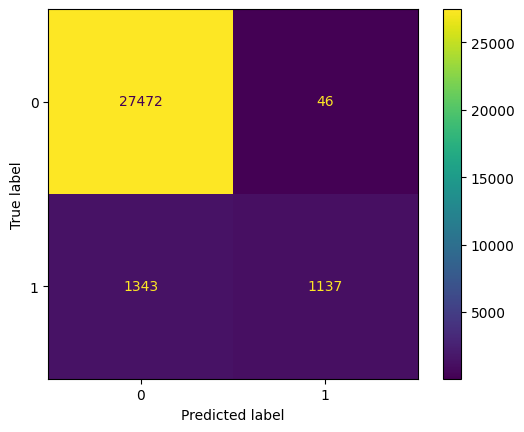

In [ ]:
# Se calcula la matriz de confusión utilizando la función confusion_matrix() de sklearn.metrics.
# Se pasan las etiquetas reales ('Real') y las etiquetas estimadas ('Estimado') como argumentos.
matriz = confusion_matrix(resultados['Real'], resultados['Estimado'])

# Se crea una instancia de ConfusionMatrixDisplay utilizando la matriz de confusión calculada.
# ConfusionMatrixDisplay permite visualizar la matriz de confusión de forma más clara y legible.
disp = ConfusionMatrixDisplay(matriz)

# Se utiliza el método plot() para visualizar la matriz de confusión.
disp.plot()
